In [1]:
import pandas as pd
import numpy as np
import os


In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [12]:

df = pd.DataFrame(X)
df['disease'] = y
df.to_csv('../data/data.csv',index=False)

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [15]:
print(f"Dataset Shape: {df.shape}")
print("--------------------------------------------")
df.info()

Dataset Shape: (303, 14)
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  disease   303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [19]:
print("Statistical Summary")
df.describe()

Statistical Summary


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [17]:
print("Missing Values in each column")
df.isnull().sum()


Missing Values in each column


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
disease     0
dtype: int64

## Handle Missing Value

In [20]:

df['ca'].fillna(df['ca'].median(), inplace=True)
df['thal'].fillna(df['thal'].median(), inplace=True)

print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
disease     0
dtype: int64


C:\Users\T\AppData\Local\Temp\ipykernel_11984\2660540643.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ca'].fillna(df['ca'].median(), inplace=True)
C:\Users\T\AppData\Local\Temp\ipykernel_11984\2660540643.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

## EDA 

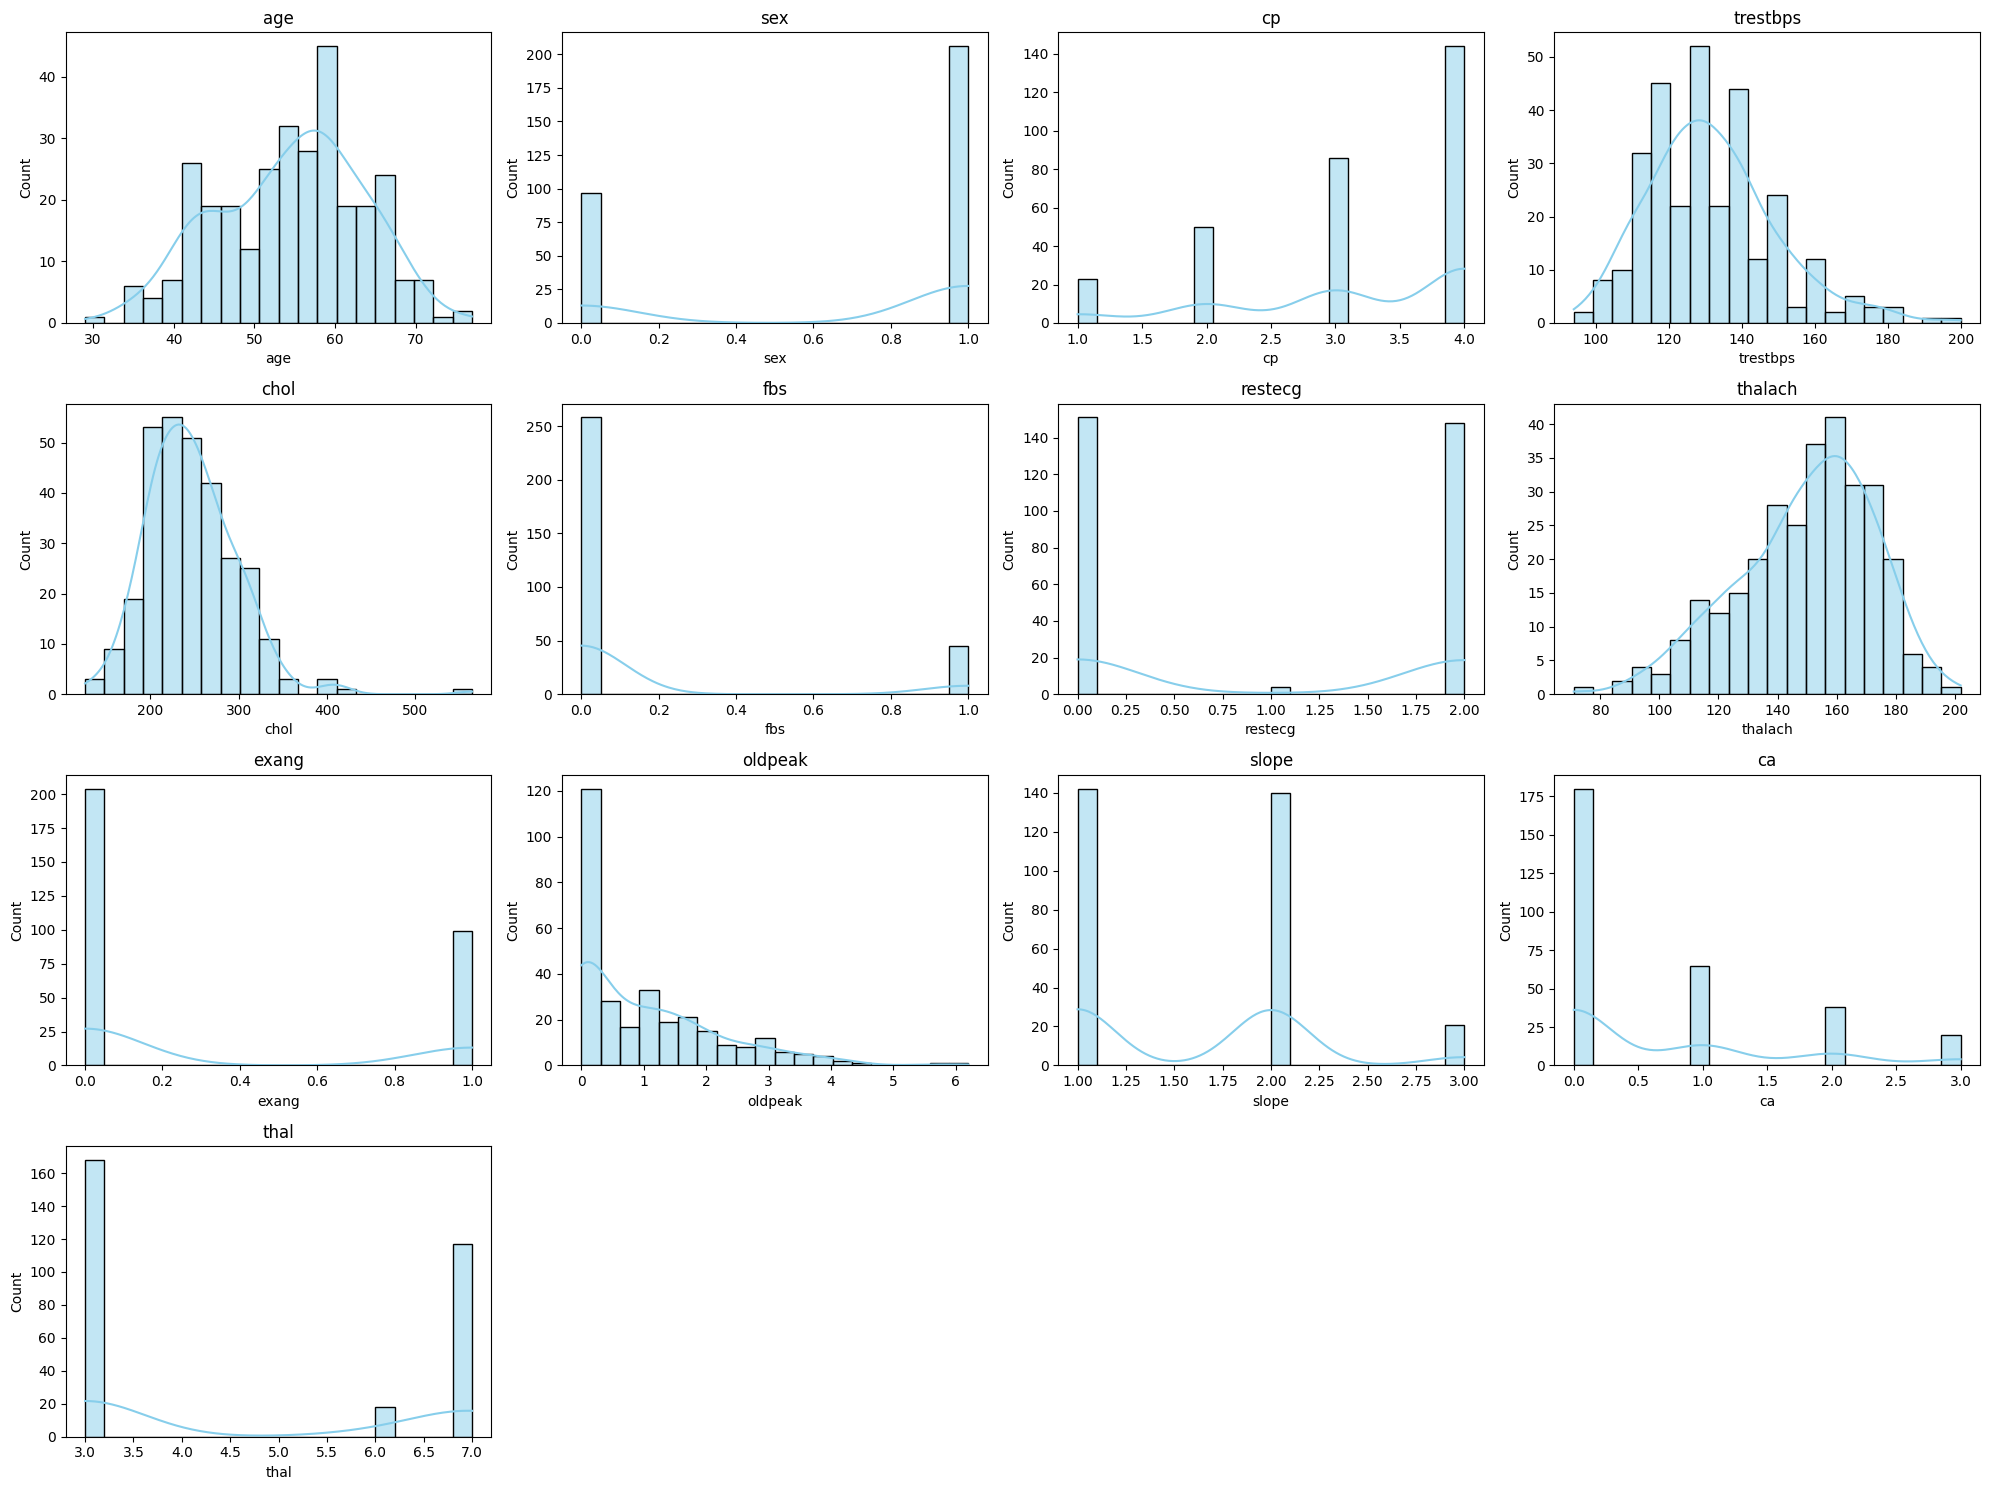

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('disease')

plt.figure(figsize=(20, 15))  
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i+1)  # grid 4x4
    sns.histplot(df[col], kde=True, color='skyblue', edgecolor='black', bins=20)
    plt.title(col)
plt.tight_layout()
plt.show()


## 'disease' Column values meaning:"
## Value Meaning
## 0 No heart disease
## 1 Mild heart disease
## 2 Moderate heart disease
## 3 Serious heart disease
## 4 Very serious heart disease

In [33]:
# target variable
df['disease'].value_counts()


disease
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

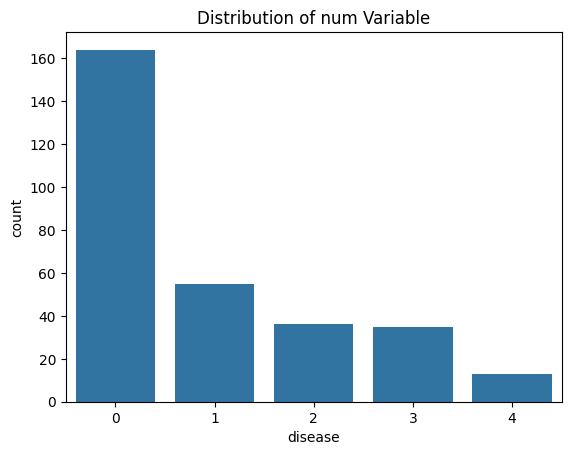

In [34]:

# to see it more clear
sns.countplot(x='disease', data=df)
plt.title('Distribution of num Variable')
plt.show()

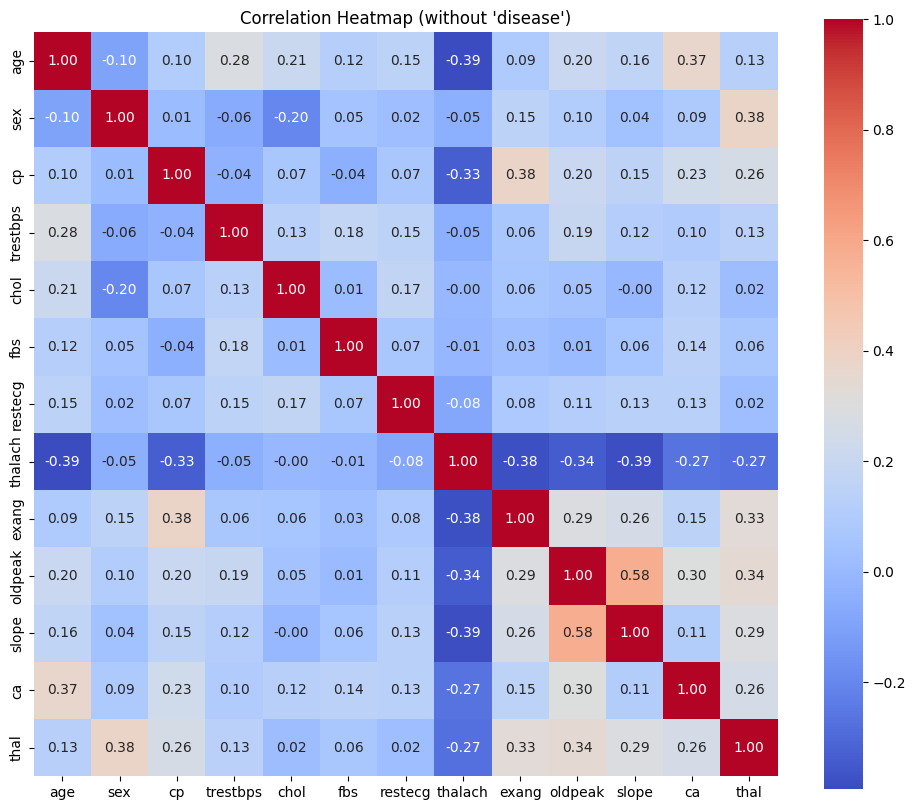

In [32]:
corr = df[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap (without 'disease')")
plt.show()

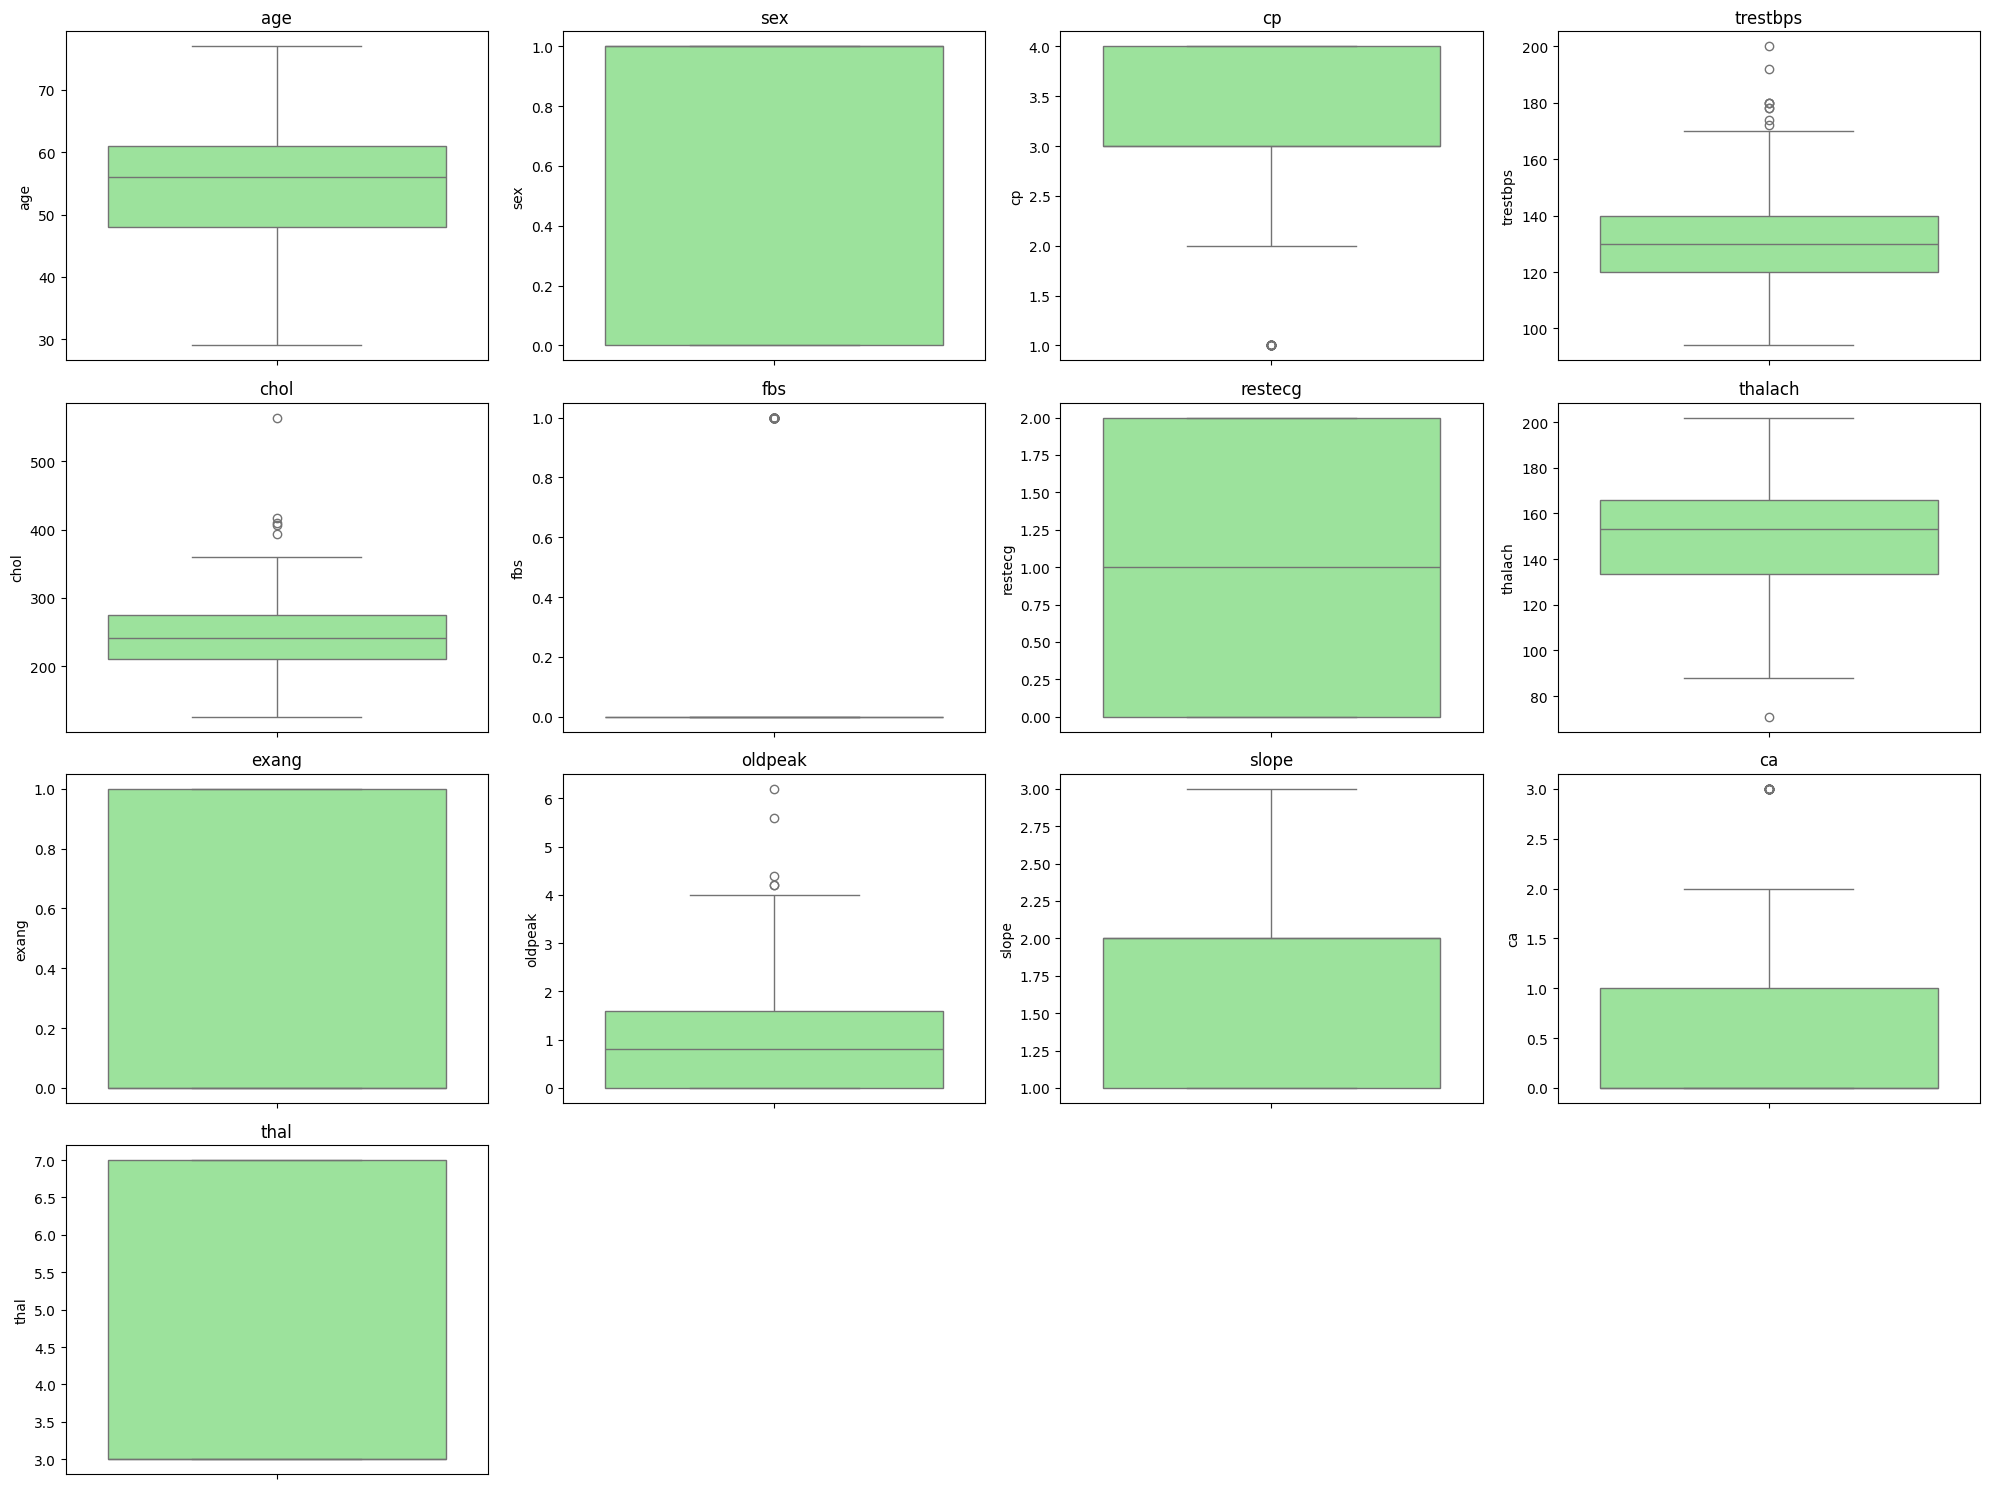

In [35]:
# Box plots for numeric features
plt.figure(figsize=(20, 15))  
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i+1)  # grid 4x4
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(col)
plt.tight_layout()
plt.show()

## Standardize numerical features


In [37]:
from sklearn.preprocessing import StandardScaler
import joblib

In [38]:
selected_to_scale = ['cp','thalach','thal','ca','oldpeak','age']
scaler = StandardScaler()
df[selected_to_scale] = scaler.fit_transform(df[selected_to_scale])
joblib.dump(scaler, '../models/scaler.pkl')


['../models/scaler.pkl']

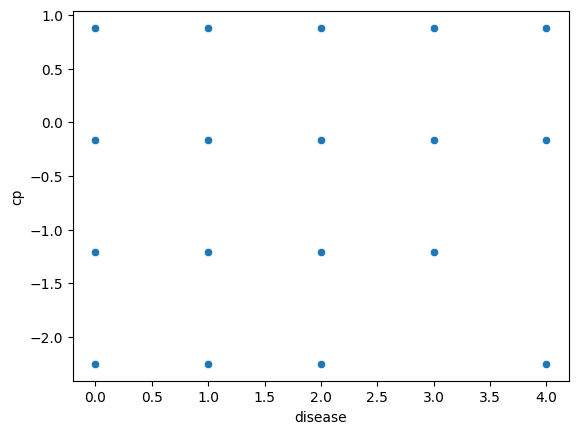

In [39]:

sns.scatterplot(data=df, x='disease', y='cp')
plt.show()

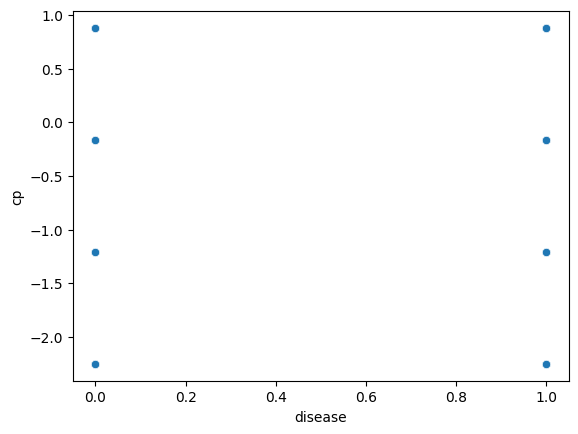

In [41]:
df["disease"] = df["disease"].apply(lambda x: 1 if x > 0 else 0)
sns.scatterplot(data=df, x='disease', y='cp')
plt.show()

In [42]:
df['disease'].value_counts()


disease
0    164
1    139
Name: count, dtype: int64

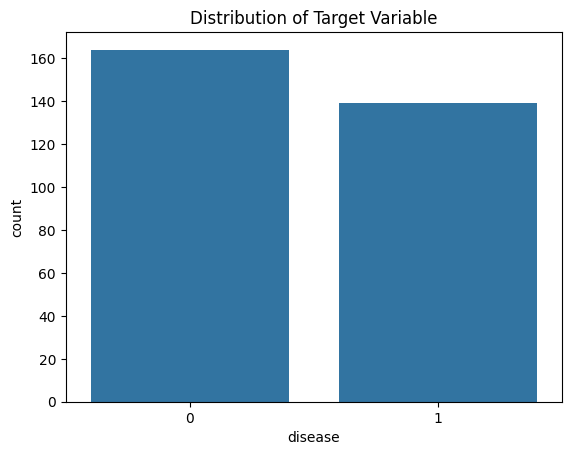

In [43]:
# Distribution of target variable
sns.countplot(x='disease', data=df)
plt.title('Distribution of Target Variable')
plt.show()

In [44]:

# saving the cleaned data
df.to_csv('../data/clean_data.csv',index=False)

In [45]:
df = pd.read_csv('../data/clean_data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,0.948726,1,-2.251775,145,233,1,2,0.017197,0,1.087338,3,-0.711131,0.660004,0
1,1.392002,1,0.877985,160,286,0,2,-1.821905,1,0.397182,2,2.504881,-0.890238,1
2,1.392002,1,0.877985,120,229,0,2,-0.902354,1,1.346147,2,1.432877,1.176752,1
3,-1.932564,1,-0.165268,130,250,0,0,1.637359,0,2.122573,3,-0.711131,-0.890238,0
4,-1.489288,0,-1.208521,130,204,0,2,0.980537,0,0.310912,1,-0.711131,-0.890238,0
